# Goodreads book recommendation system using Neural Networks

### Option 3 : DL model 

### About the dataset 

Goodreads 10k dataset contains ratings for ten thousand popular books found on the internet. In this dataset there are 100 reviews for each book, although some have less - fewer - ratings. Ratings are given from 1 to 5. <br/>
Both book IDs and user IDs are contiguous. For books, it ranges from 1-10000, for users, 1-53424. All users have made at least two ratings. Median number of ratings per user is 8. <br/>
The main goal of this project is to suggest new books to the user that may interest them to increase the user engagement. 



## Package import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

## Loading dataset

In [2]:
ratings_df = pd.read_csv('ratings.csv')
books_df = pd.read_csv('books.csv')

In [3]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Splitting the dataset into train and test set

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings_df, test_size=0.2)

In [4]:
n_users = len(ratings_df.user_id.unique())
n_books = len(ratings_df.book_id.unique())

user_index = [x-1 for x in train.user_id.values]
book_index = [x-1 for x in train.book_id.values]

user_index_test = [x-1 for x in test.user_id.values]
book_index_test = [x-1 for x in test.book_id.values]

rates = train.rating.values 
rates_test = test.rating.values

num_ratings = len(rates)
num_ratings_test = len(rates_test)

In [5]:
print("Number of users : ",n_users,"\n","Number of books :",n_books)

Number of users :  53424 
 Number of books : 10000


## Collaborative filtering with model-based approach
The idea of collaborative filtering is that the users who have agreed in the past tend to also agree in the future. If A and B read similar books, A is more likely to read a book that B has read a book which a random person has read. <br/>

#### Neural networks for recommendation 
We can estimate the ratings of the user for unread books by creating a neural network model for recommendation. 
In this approach, instead of taking the dot product of user and book embeddings as in matrix factorization models, we concatenate the user and book embeddings to a new input feature to the neural network. This approach helps to learn complex non-linear relationships.

In [6]:
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Dropout,Concatenate
from keras.models import Model

n_latent_factors = 5

book_input = Input(shape=[1], name="Inputlayer-Book")
book_embedding = Embedding(n_books+1, n_latent_factors, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)
book_vec = Dropout(0.2)(book_vec)

user_input = Input(shape=[1], name="Inputlayer-User")
user_embedding = Embedding(n_users+1, n_latent_factors, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
user_vec = Dropout(0.2)(user_vec)

concat = Concatenate(name='Concat',axis=-1)([book_vec, user_vec])
concat_dropout = Dropout(0.2)(concat)

dense_1 = Dense(50,name='FullyConnectedLayer-1')(concat)
dropout_1 = Dropout(0.2,name='Dropout')(dense_1)

# dense_2 = keras.layers.Dense(50,name='FullyConnectedLayer-2')(dense_1)
# dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)

dense_2 = Dense(20,name='FullyConnectedLayer-2', activation='relu')(dense_1)
result = Dense(1, activation='relu',name='Activation')(dense_2)

model = Model([user_input, book_input], result)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputlayer-Book (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Inputlayer-User (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Book-Embedding (Embedding)      (None, 1, 5)         50005       Inputlayer-Book[0][0]            
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         267125      Inputlayer-User[0][0]            
__________________________________________________________________________________________________
Flatten-Bo

In [8]:
# Define accuracy
threshold = 1.0

def accuracy(desired_rates, predicted_rates):
    diff_op = tf.subtract(predicted_rates, desired_rates, name='trainig_diff')
    # Just measure the absolute difference against the threshold
    good = tf.less(tf.abs(diff_op), threshold)

    return tf.reduce_mean(tf.cast(good, tf.float32))


In [9]:
model.compile('adam', 'mean_squared_error',metrics=['accuracy'])

In [10]:
history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 706863 samples, validate on 78541 samples
Epoch 1/10
706863/706863 [==============================] - 105s 149us/step - loss: 0.8330 - acc: 0.4209 - val_loss: 0.7291 - val_acc: 0.4514
Epoch 2/10
706863/706863 [==============================] - 91s 129us/step - loss: 0.7081 - acc: 0.4660 - val_loss: 0.7157 - val_acc: 0.4749
Epoch 3/10
706863/706863 [==============================] - 90s 127us/step - loss: 0.6859 - acc: 0.4827 - val_loss: 0.7067 - val_acc: 0.4662
Epoch 4/10
706863/706863 [==============================] - 89s 126us/step - loss: 0.6743 - acc: 0.4914 - val_loss: 0.7098 - val_acc: 0.4578
Epoch 5/10
706863/706863 [==============================] - 89s 125us/step - loss: 0.6668 - acc: 0.4951 - val_loss: 0.7024 - val_acc: 0.4779
Epoch 6/10
706863/706863 [==============================] - 93s 132us/step - loss: 0.6604 - acc: 0.4988 - val_loss: 0.7073 - val_acc: 0.4466
Epoch 7/10
706863/706863 [============================

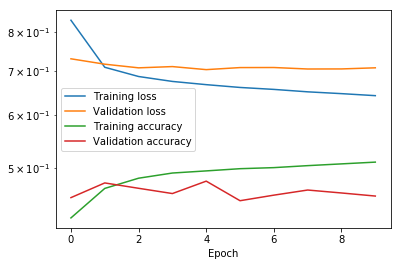

In [11]:
def plot_history(history):
    pd.Series(history.history['loss']).plot(logy=True, label='Training loss')
    pd.Series(history.history['val_loss']).plot(logy=True, label='Validation loss')
    
    pd.Series(history.history['acc']).plot(logy=True, label='Training accuracy')
    pd.Series(history.history['val_acc']).plot(logy=True, label='Validation accuracy')
    plt.legend()

    plt.xlabel("Epoch")

    plt.show()
    
plot_history(history)

## Prediction performance of the recommender system

In [16]:
from sklearn.metrics import mean_absolute_error

y_actual = test['rating']
y_hat = model.predict([test.user_id, test.book_id])
print("Mean Absolute error",mean_absolute_error(y_actual, y_hat))


Mean Absolute error 0.6642060994077716


In [14]:
# Visualizing the embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]
print("Book embeddings\n",pd.DataFrame(book_em_weights).describe())

user_em = model.get_layer('User-Embedding')
user_em_weights = user_em.get_weights()[0]
print("User embeddings\n",pd.DataFrame(user_em_weights).describe())


Book embeddings
                   0             1             2             3             4
count  10001.000000  10001.000000  10001.000000  10001.000000  10001.000000
mean      -0.334767      0.134318      0.319102     -0.325442     -0.218406
std        0.436948      0.374594      0.421844      0.435721      0.406215
min       -2.467843     -1.689174     -1.454585     -2.364446     -2.011856
25%       -0.612013     -0.123963      0.041446     -0.596333     -0.460579
50%       -0.318778      0.128830      0.307981     -0.303376     -0.181591
75%       -0.044336      0.381946      0.589273     -0.031723      0.049603
max        1.782866      1.724892      2.201112      1.564523      1.368527
User embeddings
                   0             1             2             3             4
count  53425.000000  53425.000000  53425.000000  53425.000000  53425.000000
mean       0.120973      0.127936      0.119290      0.141529      0.113150
std        0.330903      0.342123      0.360605      0

In [36]:
#Normalizing the similarity
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

0.99999994

## Manifold Embeddings

TSNE: t-Stochastic Distributed Neighbors Embedding is a method that use the idea of a manifold to map vecotrs to a lower dimensional embedded space.The primary idea behind dimension reduction with a manifold is that there is a lower dimensional representation of the vectors that can still capture the variation between different groups.

In [38]:
from sklearn.manifold import TSNE
import umap as um

def reduce_dim(weights, components = 3, method = 'tsne'):
#Reduce dimensions of embeddings
    return TSNE(components, metric = 'cosine').fit_transform(weights)
    
    
book_r = reduce_dim(book_em_weights, components = 2, method = 'tsne')
book_r.shape   

(10001, 2)

Text(0.5, 1.0, 'Book Embeddings Visualized with TSNE')

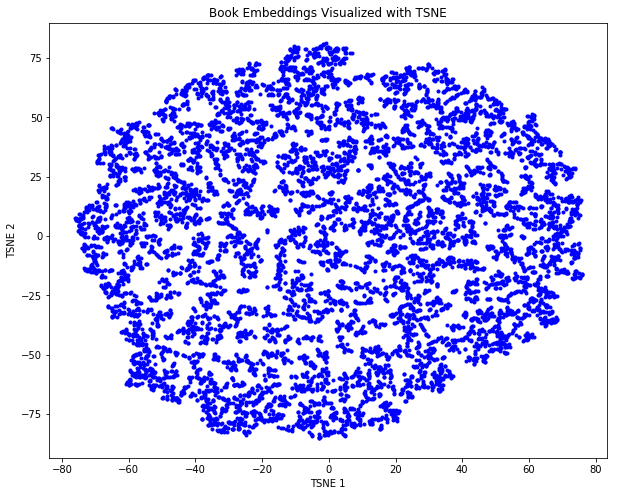

In [39]:
plt.figure(figsize = (10, 8))
plt.plot(book_r[:, 0], book_r[:, 1], 'b.')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Book Embeddings Visualized with TSNE')

## Recommendation function to predict top 5 recommended books based on user rating

In [42]:
# Creating dataset for making recommendations with the given user ID
def get_recommendations(user_id):
    book_data = np.array(list(set(ratings_df.book_id)))
    user = np.array([user_id for i in range(len(book_data))])
    predictions = model.predict([user, book_data])
    predictions = np.array([a[0] for a in predictions])
    
    recommended_book_ids = (-predictions).argsort()[:5]
    return recommended_book_ids

In [43]:
#Get recommendations for 10th user
recommended_bookids = get_recommendations(10)
print("Recommended book id ",recommended_bookids)

Recommended book id  [9565 4777 4867 2352 1894]


In [44]:
print(books_df[books_df['id'].isin(recommended_bookids)])

        id   book_id  best_book_id   work_id  books_count       isbn  \
1893  1894  17910611      17910611  21865617           59  812984277   
2351  2352     10596         10596    955346          110  451191013   
4776  4777    426025        426025   2902834           20  675093244   
4866  4867   5215879       5215879   5283119           31  425227723   
9564  9565  24819476      24819476  44460264           18  316261130   

            isbn13                        authors  original_publication_year  \
1893  9.780813e+12                Sophie Kinsella                     2013.0   
2351  9.780451e+12  Richard Bachman, Stephen King                     1996.0   
4776  9.780675e+12               William Faulkner                     1930.0   
4866  9.780425e+12            Laurell K. Hamilton                     2009.0   
9564  9.780316e+12               Elin Hilderbrand                     2015.0   

        original_title                        ...                          \
1893     

In [45]:
# Average rating prediction on Test data 
nr_sampled_users = 10

for index in np.random.choice(range(len(user_index_test)), size=nr_sampled_users):
    u = [user_index_test[index]]
    b = [book_index_test[index]]
    r = rates_test[index]

    rhat = model.predict([u, b]) 

    print ("User rating " + str(u) + " for book " + str(b) + ":" + str(r) + " predicted rating : " + str(rhat[0]))

User rating [25780] for book [6022]:4 predicted rating : [4.447914]
User rating [49965] for book [6318]:4 predicted rating : [3.8467383]
User rating [446] for book [2620]:4 predicted rating : [4.085537]
User rating [10227] for book [2040]:3 predicted rating : [3.9780366]
User rating [47919] for book [9159]:4 predicted rating : [3.8990319]
User rating [38327] for book [7339]:4 predicted rating : [3.3844733]
User rating [20553] for book [9117]:3 predicted rating : [2.527225]
User rating [50063] for book [1797]:3 predicted rating : [3.4109037]
User rating [12465] for book [106]:2 predicted rating : [4.068985]
User rating [15726] for book [1053]:4 predicted rating : [3.5762374]


In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def compute_error(model, user_index_test, book_index_test):
    ypred = model.predict([user_index_test, book_index_test])
    mae = mean_absolute_error(rates_test, ypred)
    rmse = np.sqrt(mean_squared_error(rates_test,ypred))
    return mae,rmse

mae,rmse = compute_error(model, user_index_test, book_index_test)
print("Mean absolute error on the test set: {}".format(mae))
print("Root Mean squared error on the test set: {}".format(rmse))


Mean absolute error on the test set: 0.8926977981956532
Root Mean squared error on the test set: 1.1009010741922263


In [54]:
def create_recommendations(model, df, listOfUsers, nrRecommendations):
    
    book_index = np.array(np.unique(df.book_id.values))-1
    recommendations_set = {}
    
    for user in listOfUsers:
        user_index = np.ones(len(book_index)) * user
        predicted_rates = model.predict([user_index, book_index])
        
        ranked_books_idx = np.argsort(predicted_rates, axis=0)[::-1].squeeze()
        ranked_books = book_index[ranked_books_idx] 
        recommendations_set[user] = ranked_books[:nrRecommendations]
        
    return recommendations_set



In [56]:
recommendations_set = create_recommendations(model,test,range(10),10)
print(recommendations_set)

{0: array([4868, 3628, 5580, 4483, 9566, 7947, 6590, 8946, 9076, 9842],
      dtype=int64), 1: array([4868, 3628, 5580, 4483, 9566, 7947, 6590, 8946, 9076, 9842],
      dtype=int64), 2: array([9566, 4868, 4483, 5580, 4778, 6590, 3628, 3395, 2353, 6642],
      dtype=int64), 3: array([4868, 8548, 5580, 3885, 9566, 3628, 1380, 2865, 7593, 7401],
      dtype=int64), 4: array([9566, 4868, 4483, 6590, 5580, 4778, 2353, 3395,  862, 3628],
      dtype=int64), 5: array([9566, 4868, 4483, 5580, 3395, 4778, 6590, 3628, 2353, 6642],
      dtype=int64), 6: array([9566, 4868, 4483, 5580, 6590, 3628, 3395, 2353, 6642, 4778],
      dtype=int64), 7: array([4868, 3628, 5580, 9566, 7947, 8548, 4483, 7593, 3395, 6590],
      dtype=int64), 8: array([9566, 4868, 6590, 4483, 5580, 3395, 2353, 8854,  862, 6361],
      dtype=int64), 9: array([4868, 3628, 5580, 9566, 7947, 4483, 8548, 7593, 3395, 6590],
      dtype=int64)}


## Ranking metrics


In [62]:
def create_validation_set(df, minRate=3.5, k=5):
    validation_set = {}
    
    for user in np.unique(df['user_id'].values) - 1:
        rated_books = df[df['user_id'] == user]['book_id'].values -1
        rates = df[df['user_id'] == user]['rating'].values

        best_ranked_books = rated_books[np.where(rates > minRate)[0]]
        if len(best_ranked_books) >= k:
            validation_set[user] = best_ranked_books
            
    return validation_set



def precisionAtK(validations_set, recommendations_set, k=5):
    
    res = []
    for user in validations_set.keys():
        
        v = validations_set[user]
        r = recommendations_set[user][:k]
        
        ans = len(np.intersect1d(v, r)) / k
        res.append(ans)

    return np.mean(res)


def compute_precisionAtK_from_recommendations(model, df_test, nrRecommendations, k, validation_set=None):
#Compute precisionAtK from recommendations and validation set. Generate recommendations applying 'model' to dataset 'df_test'.
     
    
    if validation_set is None:
        validation_set = create_validation_set(df_test, minRate=3.5, k=k)
        
    recommendations_set = create_recommendations(model, df_test,validation_set.keys(), nrRecommendations=nrRecommendations)
    precision = precisionAtK(validation_set, recommendations_set, k=k)
    
    return precision


In [60]:
validation_set = create_validation_set(test, minRate=3.5, k=5)

In [63]:
k=5
precision = compute_precisionAtK_from_recommendations(model, test,nrRecommendations=5, k=k,validation_set=validation_set)
print("Precision@{} is {}".format(k, precision))

Precision@5 is 0.0006196746707978311
